<table style="width:98%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFFFF">
    <td width ="59%">
        <h1 style="font-size:3vw;color:#A00000;text-align:center">
        Autonomous Soil Exploration System using Artificial Curiosity
        </h1>
        <h1 style="font-size:2vw;color:#A00000;text-align:center">
        <font style="font-family:Snell Roundhand, cursive;color:darkgreen">
            Draw Neural Network Schaeme
        </font>
        </h1>
        <h1 style="font-size:1.2vw;color:#A00000;text-align:center">
        Prof. Goren Gordon, Philippe Artsztein
        </h1>
    </td>
    <td width ="39%"><img src="./MyLogo.jpg" width="80%" height="80%" style="float:left;vertical-align:bottom;margin: 20px 20px"></td>
  </tr>
</table>

In [1]:
import matplotlib.pyplot as plt
from math import cos, sin, atan

<div class="alert alert-danger">
Here we present a 2D Neural Network display capability in a very simple way.<br>
</div>

<div class="pagebreak"> </div>

<div class="alert alert-success">
<b><u>Neuron</u></b><br>
is a class to store and to draw Neuron.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>x, y</i></u><br>
&emsp;&emsp;stors the location of a Neuron<br>
&emsp;&emsp;Example:<br>
&emsp;&emsp;NewNeuron= Neuron(6, 8)<br>
&emsp;&emsp;&emsp;Store an Neural at position x=2, y=8<br>
&emsp;The constructor return the NeuralNetworkDisplay object.
    
<b><u>Methods</u></b><br>
&emsp;<u><i>Draw(...)</i></u><br>
&emsp;&emsp;This method draws the Neural.<br>
&emsp;Example:<br>
&emsp;&emsp;Draw(2, "red")<br>
&emsp;&emsp;&emsp;Draws the Neural with a radiuse of 2 and with red color.<br>

</div>

In [2]:
class Neuron():
    def __init__(self, x, y):
        self.x= x
        self.y= y

    def Draw(self, NeuronRadius, NeuronColor):
        Circle= plt.Circle((self.x, self.y), radius=NeuronRadius, fill=False, 
                           linewidth=0.6, color=NeuronColor)
        plt.gca().add_patch(Circle)
        return(self.x)

<div class="alert alert-success">
<b><u>Layer</u></b><br>
is a class to store, calulates position of Neurons, draw them and line connecting Neurons between consecutive layers.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>Network</i></u><br>
&emsp;&emsp;NeuralNetworkBuilder Object<br>
&emsp;<u><i>NumberOfNeuronsInThisLayer</i></u><br>
&emsp;&emsp;stors the Number of Neurons in this layer<br>
&emsp;<u><i>WidestLayer</i></u><br>
&emsp;&emsp;Each layer can have a different number of Neurons, WidestLayer is the largest amount the maximum of Neuron.<br>
&emsp;<u><i>Appearance</i></u><br>
&emsp;&emsp;Color appearance of Neural Network components.<br>
&emsp;<u><i>HDBL</i></u><br>
&emsp;&emsp;Horizontal distance between layers.<br>
&emsp;<u><i>VDBL</i></u><br>
&emsp;&emsp;Vertical distance between Neurons.<br>
    
<b><u>Methods</u></b><br>
&emsp;<u><i>Draw(...)</i></u><br>
&emsp;&emsp;This method draws the Layer.<br>

</div>

In [3]:
class Layer():
    def __init__(self, Network, NumberOfNeuronsInThisLayer, WidestLayer, Appearance, HDBL=6, VDBL=2):
        self.HorizontalDistanceBetweenLayers= HDBL    # 6
        self.VerticalDistanceBetweenNeurons = VDBL    # 2
        self.NeuronRadius                   = 0.3
        self.WidestLayer                    = WidestLayer
        self.PreviousLayer                  = self.Get_Previous_Layer(Network)
        self.x                              = self.Calculate_Layer_X_Position()
        self.Neurons                        = self.Intialise_Neurons(NumberOfNeuronsInThisLayer)
        self.Appearance            = Appearance

    def Intialise_Neurons(self, NumberOfNeuronsInThisLayer):
        Neurons= []
        yy= self.Calculate_Bottom_Margin_So_Layer_Is_Centered(NumberOfNeuronsInThisLayer)
        for iteration in range(NumberOfNeuronsInThisLayer):
            NewNeuron= Neuron(self.x, yy)
            Neurons.append(NewNeuron)
            yy+= self.VerticalDistanceBetweenNeurons
        return(Neurons)

    def Calculate_Bottom_Margin_So_Layer_Is_Centered(self, NumberOfNeuronsInThisLayer):
        return(self.VerticalDistanceBetweenNeurons* 
               (self.WidestLayer-NumberOfNeuronsInThisLayer)/2)

    def Calculate_Layer_X_Position(self):
        if(self.PreviousLayer):
            return(self.PreviousLayer.x+self.HorizontalDistanceBetweenLayers)
        else:
            return(0)

    def Get_Previous_Layer(self, Network):
        if(len(Network.Layers)>0):
            return(Network.Layers[-1])
        else:
            return(None)

    def Line_Between_Two_Neurons(self, Neuron1, Neuron2):
        Angle       = atan((Neuron2.y-Neuron1.y)/float(Neuron2.x-Neuron1.x))
        x_adjustment= self.NeuronRadius*cos(Angle)
        y_adjustment= self.NeuronRadius*sin(Angle)
        Line        = plt.Line2D((Neuron1.x-x_adjustment, Neuron2.x+x_adjustment),
                                 (Neuron1.y-y_adjustment, Neuron2.y+y_adjustment),
                                 linewidth=0.4, color=self.Appearance["NetColor"])
        plt.gca().add_line(Line)

    def Draw(self, ActivationFunction, layerType=0):
        for neuron in self.Neurons:
            neuron.Draw(self.NeuronRadius, self.Appearance["NeuronsColor"])
            if self.PreviousLayer:
                for previous_layer_neuron in self.PreviousLayer.Neurons:
                    self.Line_Between_Two_Neurons(neuron, previous_layer_neuron)

        x_text = self.WidestLayer*self.VerticalDistanceBetweenNeurons
        if(layerType==0):
            plt.text(self.x, 
                     self.Neurons[0].y-self.VerticalDistanceBetweenNeurons/2, 
                     'Input Layer',
                     horizontalalignment='center',
                     verticalalignment  ='top',
                     rotation           ='vertical',
                     fontsize           = 8,
                     color              = self.Appearance["LeyersNameColor"])
            plt.text(self.x+self.HorizontalDistanceBetweenLayers/2, 0,
                     'Activation\nFunction\n'+ActivationFunction,
                     horizontalalignment='center',
                     verticalalignment  ='top',
                     rotation           ='horizontal',
                     fontsize           = 10)
        elif(layerType==-1):
            plt.text(self.x, 
                     self.Neurons[0].y-self.VerticalDistanceBetweenNeurons/2, 
                     'Output Layer', 
                     horizontalalignment='center',
                     verticalalignment  ='top', 
                     rotation           ='vertical', 
                     fontsize           = 8,
                     color              = self.Appearance["LeyersNameColor"])
        else:
            plt.text(self.x, 
                     self.Neurons[0].y-self.VerticalDistanceBetweenNeurons/2, 
                     'Hidden Layer '+str(layerType), 
                     horizontalalignment='center',
                     verticalalignment  ='top', 
                     rotation           ='vertical', 
                     fontsize           = 8,
                     color              = self.Appearance["LeyersNameColor"])
            plt.text(self.x+self.HorizontalDistanceBetweenLayers/2, 0,
                     'Activation\nFunction\n'+ActivationFunction,
                     horizontalalignment='center',
                     verticalalignment  ='top',
                     rotation           ='horizontal',
                     fontsize           = 10)

<div class="alert alert-success">
<b><u>NeuralNetworkBuilder</u></b><br>
is a class that encapsulate all component and properties of neural network.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>WidestLayer</i></u><br>
&emsp;&emsp;Each layer can have a different number of Neurons, WidestLayer is the largest amount the maximum of Neuron.<br>
&emsp;<u><i>ActivationFunctionList</i></u><br>
&emsp;&emsp;A list of the Activation Function of every layer connection in the Network.<br>
&emsp;<u><i>HDBL</i></u><br>
&emsp;&emsp;Horizontal distance between layers.<br>
&emsp;<u><i>Appearance</i></u><br>
&emsp;&emsp;Color appearance of Neural Network components.<br>
    
<b><u>Methods</u></b><br>
&emsp;<u><i>Draw(...)</i></u><br>
&emsp;&emsp;Activates all the sub-functions that display the network.<br>
&emsp;&emsp;If a file name is passed as an input, the figure is been save on the hard disk.<br>

</div>

In [4]:
class NeuralNetworkBuilder():
    def __init__(self, WidestLayer, ActivationFunctionList, HDBL, Appearance):
        self.WidestLayer           = WidestLayer
        self.ActivationFunctionList= ActivationFunctionList
        self.HDBL                  = HDBL
        self.Layers                = []
        self.Layertype             = 0
        self.Appearance            = Appearance

    def Add_Layer(self, NumberOfNeuronsInThisLayer ):
        layer= Layer(self, NumberOfNeuronsInThisLayer, self.WidestLayer, self.Appearance, HDBL=self.HDBL)
        self.Layers.append(layer)

    def Draw(self, TheFileName):
        plt.figure()
        for iii in range(len(self.Layers)):
            Layer= self.Layers[iii]
            if(iii== len(self.Layers)-1):
                iii= -1
            Layer.Draw(self.ActivationFunctionList[iii], iii)
        plt.axis("scaled")
        plt.axis("off")
        plt.title("Neural Network Schaeme", fontsize=12, 
                  color=self.Appearance["TitleColor"])
        if(TheFileName):
            plt.savefig(TheFileName)
        plt.show()

<div class="alert alert-success">
<b><u>NeuralNetworkDisplay</u></b><br>
is a class to visualize an auto scale, fully connected, Neural Network.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>LeyersList</i></u><br>
&emsp;&emsp;A list of the numbers of Neural in every layer of the Network.<br>
&emsp;<u><i>ActivationFunctionList</i></u><br>
&emsp;&emsp;A list of the Activation Function of every layer connection in the Network.<br>
&emsp;The constructor return the NeuralNetworkDisplay object.<br>
&emsp;&emsp;Example:<br>
&emsp;&emsp;MyNN= NeuralNetworkDisplay( [6,5,4,3], ["Tanh", "Tanh", "Sigmoid"] )<br>
&emsp;&emsp;&emsp;int this example, there are 4 layers in the Neural Network.<br>
&emsp;&emsp;&emsp;The first list contain the number of Neural in each layer:<br>
&emsp;&emsp;&emsp;&emsp;the first number '6', is the number of featurs in input layer.<br>
&emsp;&emsp;&emsp;&emsp;the second and third numbers '5','4' are the number of Neural in the hidden layer.<br>
&emsp;&emsp;&emsp;&emsp;the last number '3', is the number of featurs of output layer.<br>
&emsp;&emsp;&emsp;The second list contain the Activation Functions:<br>
&emsp;&emsp;&emsp;&emsp;The first function name "Tanh", is the Activation Functions of the first hidden layer.<br>
&emsp;&emsp;&emsp;&emsp;The second function name "Tanh", is the Activation Functions of the second hidden layer.<br>
&emsp;&emsp;&emsp;&emsp;The last function name "Sigmoid", is the Activation Functions of the last output layer.<br>

<b><u>Methods</u></b><br>
&emsp;<u><i>SetAppearance()(...)</i></u><br>
&emsp;&emsp;Change color appearance of the Neural Network:<br>
&emsp;&emsp;&emsp;NeuronsColor, an optional ability to chang the Neurons Color<br>
&emsp;&emsp;&emsp;NetColor, an optional ability to change  the Net Color<br>
&emsp;&emsp;&emsp;TitleColor, an optional ability to change the Title Color<br>
&emsp;&emsp;&emsp;LeyersNameColor, an optional ability to change the Leyers Name Color<br>
&emsp;Example:<br>
&emsp;&emsp;MyNN.SetAppearance(NetColor="tab:blue", LeyersNameColor="red")<br>
&emsp;&emsp;&emsp;Change Net Color to 'tab:blue' and Leyers Name Color to 'red'<br>
    
&emsp;<u><i>Draw()(...)</i></u><br>
&emsp;&emsp;This method draws the Neural Network.<br>
&emsp;&emsp;If a file name is passed as an input, the figure is been save on the hard disk.<br>
&emsp;Example:<br>
&emsp;&emsp;MyNN.Draw()<br>
&emsp;&emsp;&emsp;Draws the Neural Network.<br>
&emsp;&emsp;MyNN.Draw("NeuralNetwork.jpg")<br>
&emsp;&emsp;&emsp;Draws and Save the Neural Network as 'NeuralNetwork.jpg' on hard-disk.<br>

</div>

In [5]:
class NeuralNetworkDisplay():
    def __init__(self, LeyersList, ActivationFunctionList):
        self.LeyersList            = LeyersList
        self.WidestLayer           = max(LeyersList)
        self.ActivationFunctionList= ActivationFunctionList
        self.HDBL                  = (self.WidestLayer*4)/len(LeyersList)
        self.Appearance            = dict(NeuronsColor="darkred", NetColor="tab:blue", 
                                          TitleColor="darkred", LeyersNameColor="black")
        
    def SetAppearance(self, NeuronsColor="darkred", NetColor="tab:blue", 
                         TitleColor="darkred", LeyersNameColor="black"):
        self.Appearance["NeuronsColor"]   = NeuronsColor
        self.Appearance["NetColor"]       = NetColor
        self.Appearance["TitleColor"]     = TitleColor
        self.Appearance["LeyersNameColor"]= LeyersNameColor

    def Draw( self, TheFileName=None):
        Network= NeuralNetworkBuilder(self.WidestLayer, 
                               self.ActivationFunctionList, 
                               self.HDBL, 
                               self.Appearance)
        for lll in self.LeyersList:
            Network.Add_Layer(lll)
        Network.Draw(TheFileName)

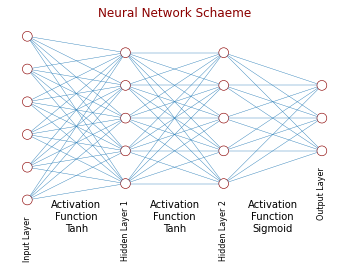

In [6]:
MyNN= NeuralNetworkDisplay( [6,5,5,3], ["Tanh", "Tanh", "Sigmoid"] )
#MyNN= NeuralNetworkDisplay( [2,3,9,2], ["Tanh", "Tanh", "Sigmoid"] )

#MyNN.Draw()                     # Draw without saving figurs to a file
# or
MyNN.SetAppearance(NetColor="tab:blue")
MyNN.Draw("NeuralNetwork.jpg")   # Draw and save figurs to a fi